In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipywidgets import Button,Dropdown,Checkbox
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

In [2]:
def select_files(b):
    clear_output()                                         # Button is deleted after it is clicked.
    root = Tk()
    root.withdraw()                                        # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True)   # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True)    # List of selected files will be set button's file attribute.
    print('List of file(s) selected:\n',b.files)

Select CrowdMag File(s)

In [3]:
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

List of file(s) selected:
 ('C:/Users/judit/OneDrive/Documents/GitHub/NOAA_CrowdMag/magneto/data/crowdmag/crowdmag_March 9 2022_iPhone12,1_2022-03-09 164809.csv',)


In [6]:
def dataParse(files):
    filePaths = files
    fileNames = []
    
    # create a list containing file names
    for i in range(len(filePaths)):
        filePath = filePaths[i]  # file path
        fileName = os.path.basename(filePath)
        fileNames.append(fileName)

    # read in files and create a new data frame for each file
    dataFrames = []
    for i in range(len(filePaths)):
        file = filePaths[i]
        data = pd.read_csv(file, parse_dates=['Time (UTC)'],index_col=0)

        # find start/end times 
        #(ultimately will find best window over multiple data sets of roughly same time period for stacking)
        # for now, this is for a single data set
        startTime = data.index.min()
        endTime = data.index.max()

        # assigning columns
        xMag = data.iloc[:,2]
        yMag = data.iloc[:,3]
        zMag = data.iloc[:,4]

        # calculating H (horizontal magnitude) and T (total magnitude)
        hMag = np.sqrt(xMag**2 + yMag**2)
        tMag = np.sqrt(xMag**2 + yMag**2 + zMag**2)

        # create a new data frame
        df = pd.DataFrame({'xMag':xMag,'yMag':yMag,'zMag':zMag,'hMag':hMag,'tMag':tMag})
        dataFrames.append(df)
    
    return startTime,endTime,fileNames,dataFrames

In [7]:
# map fileNames to dataFramesList
startTime, endTime, fileNames, dataFrames = dataParse(fileselect.files)
dataFrames[0]

,xMag,yMag,zMag,hMag,tMag
Time (UTC),,,,,
2022-03-05 16:37:22,-17361.25,-23743.80,-84427.79,29413.959951,89404.881099
2022-03-05 16:38:32,-17381.16,-23686.29,-84288.76,29379.330437,89262.198714
2022-03-05 16:39:42,-17489.24,-23751.35,-84211.65,29495.764825,89227.810341
2022-03-05 16:40:52,-17312.21,-23791.64,-84253.30,29423.710659,89243.337622
2022-03-05 16:42:02,-17333.72,-23961.66,-84259.07,29573.958122,89298.431544
...,...,...,...,...,...
2022-03-09 16:43:05,-29843.95,-24788.01,-79146.91,38795.705837,88143.860557
2022-03-09 16:44:14,-29875.52,-24701.58,-79084.35,38764.864888,88074.111773
2022-03-09 16:45:25,-30014.35,-24858.02,-79240.62,38971.558402,88305.482402


In [8]:
# create dropdown menu to choose file type
fileTypes = ['xMag','yMag','zMag','hMag','tMag']
fileType = Dropdown(options=fileTypes)

Select data type

In [9]:
fileType

Dropdown(options=('xMag', 'yMag', 'zMag', 'hMag', 'tMag'), value='xMag')

In [10]:
# pull corresponding GeoMag data and plot

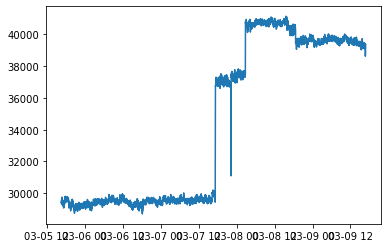

In [11]:
# test plot
x = dataFrames[0].index
y = dataFrames[0].loc[:,'hMag']
plt.plot(x,y)